## MOVIE CORRELATION PROJECT 

In [2]:
# For data manipulation

import pandas as pd
import numpy as np

# For data visualization

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv(r"C:\Users\WHITNEY\Documents\datasets\movies.csv")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# split by delimiter the released
df[['year_released','country_released']] = df['released'].str.split('(',n=1, expand=True)
df['year_released'] = df['year_released'].str.strip()
df['country_released'] = df['country_released'].str.replace(')', '').str.strip()
df.head()

C:\Users\WHITNEY\AppData\Local\Temp\ipykernel_13276\2945107391.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['country_released'] = df['country_released'].str.replace(')', '').str.strip()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [6]:
# let's find the missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
year_released - 0.0002608242044861763%
country_released - 0.0002608242044861763%


In [7]:
df.isna().sum()

name                   0
rating                77
genre                  0
year                   0
released               2
score                  3
votes                  3
director               0
writer                 3
star                   1
country                3
budget              2171
gross                189
company               17
runtime                4
year_released          2
country_released       2
dtype: int64

In [8]:
#  replacing the null values with 0 and the mean
df.fillna(0, inplace=True)
# df.fillna(df.mean(), inplace=True)

In [9]:
# data types for each columns
df.dtypes

name                 object
rating               object
genre                object
year                  int64
released             object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget              float64
gross               float64
company              object
runtime             float64
year_released        object
country_released     object
dtype: object

In [10]:
# changing the data type from a float to an integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [11]:
# checking for duplicates
df = df.drop_duplicates()

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States


In [13]:
# checking to see if both columns are the same. They differ sometimes
df[['country', 'country_released']].tail(8)

,country,country_released
7660,United States,United States
7661,United States,United States
7662,United States,United States
7663,United States,United States
7664,United States,United States
7665,United States,Cameroon
7666,United States,United States
7667,South Africa,United States


In [14]:
# looking for the years in the dataset
df['year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [15]:
df['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', 0, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

In [16]:
df['country_released'].unique()

array(['United States', 'Australia', 'Japan', 'Ireland', 'Argentina',
       'Soviet Union', 'United Kingdom', 'Sweden', 'France', 'Canada',
       'Brazil', 'South Korea', 'West Germany', 'Italy', 'Denmark',
       'Netherlands', 'Uruguay', 'Hong Kong', 'Taiwan', 'Yugoslavia',
       'Spain', 'Finland', 'South Africa', 'Philippines', 'Portugal',
       'Mexico', 'Germany', 'New Zealand', 'Iran', 'Greece', 'Singapore',
       'Poland', 'India', 'Federal Republic of Yugoslavia', 'Iceland',
       'Belgium', 'Israel', 'Hungary', 'China', 'Russia', 'Norway',
       'Austria', 'Thailand', 'Puerto Rico', 'Turkey', 'Romania',
       'Czech Republic', 'Latvia', 'Indonesia', 'Bahrain', 'Kazakhstan',
       0, 'Malaysia', 'Croatia', 'Bulgaria', 'Lebanon',
       'United Arab Emirates', 'Ukraine', 'Bahamas', 'Kuwait', 'Vietnam',
       'Cameroon'], dtype=object)

In [17]:
# find the highest grossing films
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States


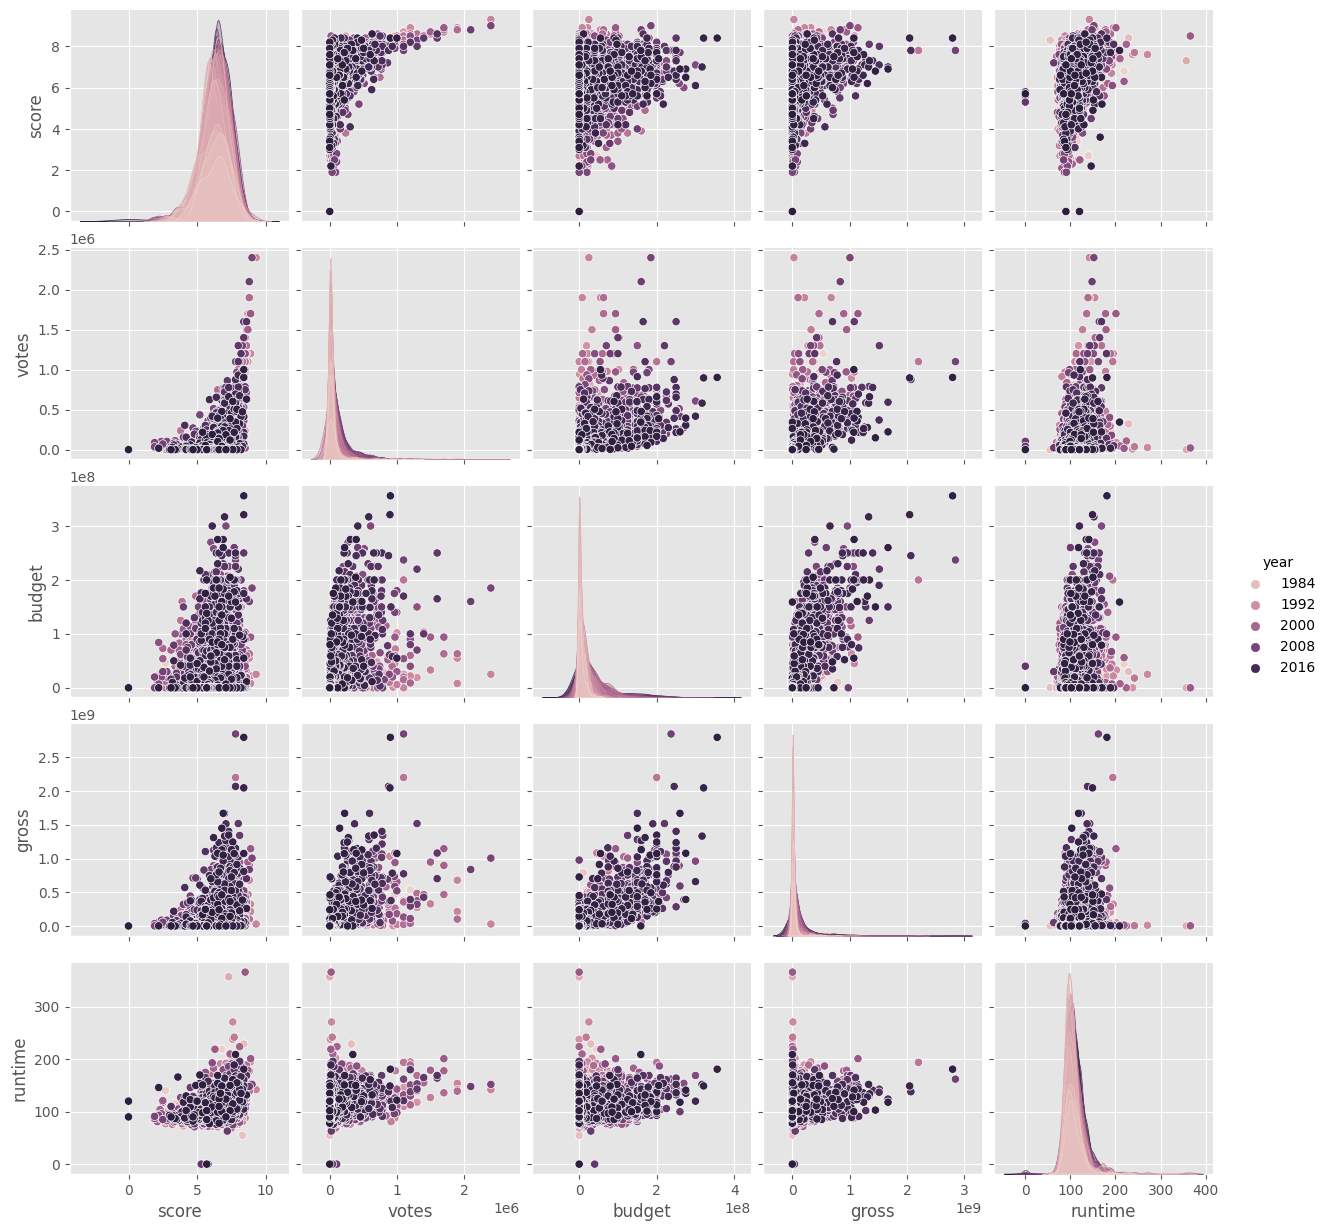

In [18]:
# plotting the columns with numerical data 
sns.pairplot(df.select_dtypes(['number']), hue='year')
plt.show()

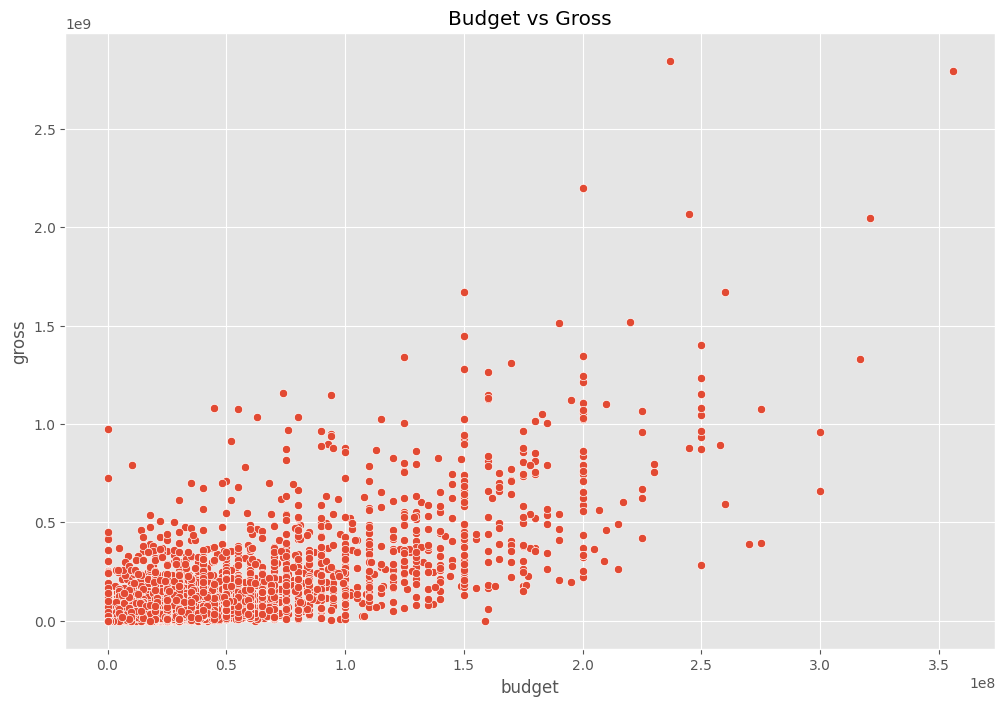

In [19]:
# scatter plot with budget vs gross 

sns.scatterplot(x='budget', y='gross', data=df)
plt.title('Budget vs Gross')
plt.show()

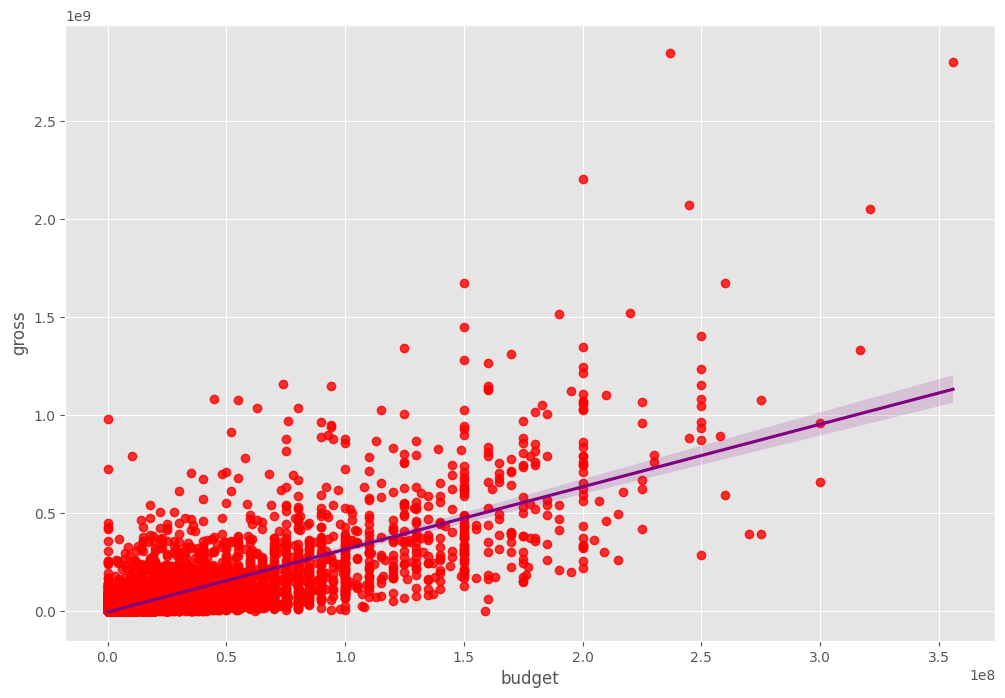

In [20]:
# finding the correlation 
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"purple"})
plt.show()

In [21]:
# finding the correlation
df.corr(method='pearson')

C:\Users\WHITNEY\AppData\Local\Temp\ipykernel_13276\2485733805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


C:\Users\WHITNEY\AppData\Local\Temp\ipykernel_13276\2200195592.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


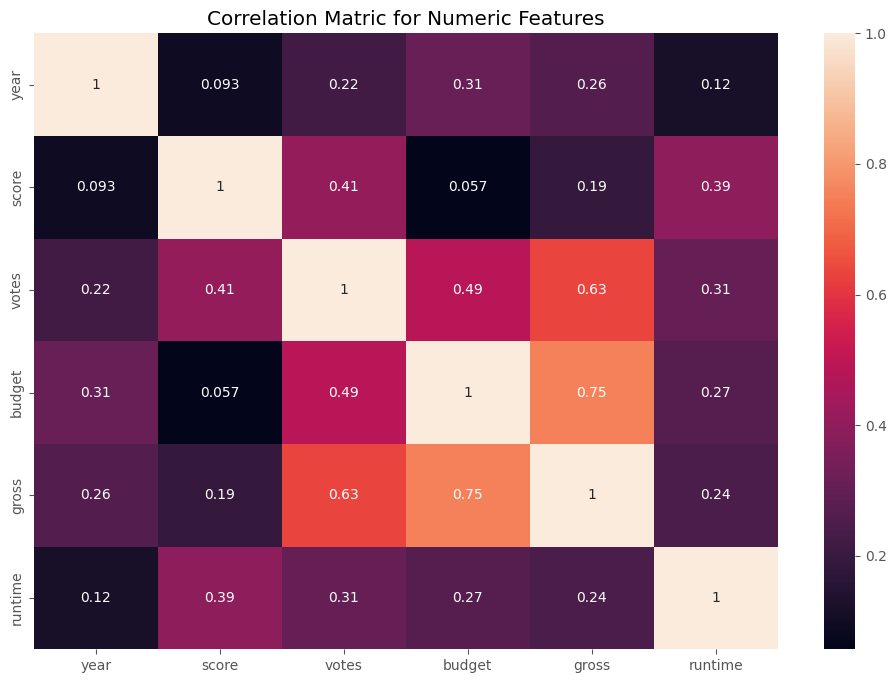

In [22]:
# plotting the correlation
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.show()

In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980",United States


In [24]:
df_numerized = df

for col_name in df_numerized.columns:
     if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized[col_name]

0       57
1       57
2       57
3       57
4       57
5       57
6       57
7       57
8       57
9       57
10      57
11      57
12      57
13      57
14      57
15      57
16      57
17      57
18      57
19      57
20      57
21      57
22      57
23      57
24      57
25      57
26      57
27      57
28      57
29      57
30      57
31      57
32      57
33      57
34      57
35      57
36      57
37      57
38      57
39      57
40      57
41       2
42      57
43      57
44      57
45      57
46      57
47      57
48      57
49      29
50      57
51      57
52      57
53      57
54      57
55      57
56      57
57      57
58      57
59      26
60      57
61      57
62       1
63      57
64      57
65      57
66      48
67      57
68      57
69      57
70      57
71      57
72      57
73      57
74      57
75      57
76      57
77      57
78      56
79      50
80      57
81      57
82      57
83      17
84      57
85      57
86      57
87      57
88      57
89      57
90      57

In [25]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146,1511,57
1,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104,1312,57
2,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124,1569,57
3,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88,1312,57
4,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98,1361,57


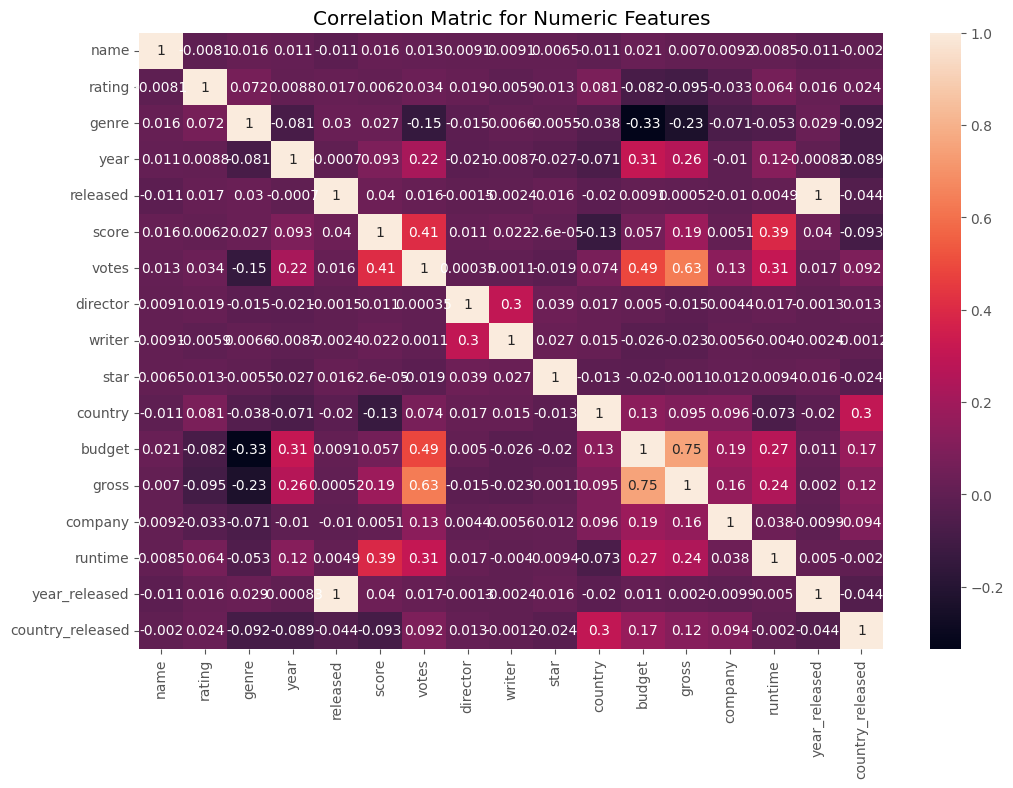

In [32]:
corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
# plt.figure(figsize=(20,10))
plt.show()

In [27]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,-0.011223,-0.001968
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.015735,0.023977
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,0.029039,-0.091572
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,-0.000832,-0.089289
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,0.999912,-0.044096
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.039939,-0.092741
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.016892,0.091945
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.001275,0.013331
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.002421,-0.001201
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,0.015597,-0.023540


In [33]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()

corr_pairs

name              name                1.000000
                  rating             -0.008069
                  genre               0.016355
                  year                0.011453
                  released           -0.011311
                  score               0.016377
                  votes               0.013038
                  director            0.009079
                  writer              0.009081
                  star                0.006472
                  country            -0.010737
                  budget              0.020548
                  gross               0.006989
                  company             0.009211
                  runtime             0.008483
                  year_released      -0.011223
                  country_released   -0.001968
rating            name               -0.008069
                  rating              1.000000
                  genre               0.072423
                  year                0.008779
             

In [34]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre             budget             -0.334021
budget            genre              -0.334021
gross             genre              -0.234297
genre             gross              -0.234297
                  votes              -0.145296
votes             genre              -0.145296
country           score              -0.133346
score             country            -0.133346
gross             rating             -0.095450
rating            gross              -0.095450
score             country_released   -0.092741
country_released  score              -0.092741
genre             country_released   -0.091572
country_released  genre              -0.091572
year              country_released   -0.089289
country_released  year               -0.089289
rating            budget             -0.081939
budget            rating             -0.081939
year              genre              -0.081261
genre             year               -0.081261
country           runtime            -0.073319
runtime      

In [37]:
# columns with high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes             gross               0.632870
gross             votes               0.632870
                  budget              0.750157
budget            gross               0.750157
released          year_released       0.999912
year_released     released            0.999912
name              name                1.000000
writer            writer              1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
released          released            1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
year_released

### Votes and gross have the highest correlation